In [55]:
# Importerar de paket jag behöver för analysen
# (pandas för datahantering, numpy för beräkningar, matplotlib/seaborn för grafer osv.)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline
customer_data = pd.read_csv("customerdata4.csv")
customer_data.head()


,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
# Använder describe() för att få en snabb överblick över datan
# Här ser jag t.ex. medelvärde, standardavvikelse och min/max för varje kolumn.
customer_data.describe()


,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


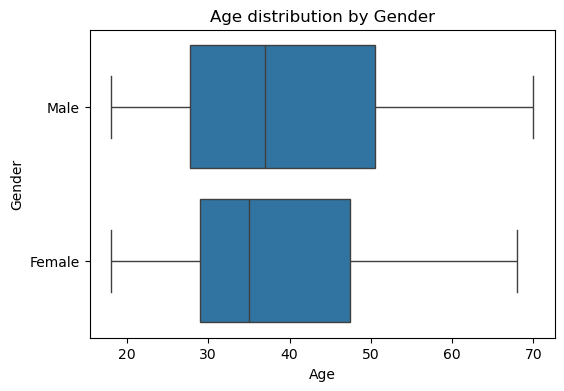

In [57]:
# Ritar boxplots för att se fördelningen i variablerna uppdelat på kön
# Boxplotsen hjälper oss att upptäcka outliers och skillnader mellan grupperna.
plt.figure(figsize=(6,4))
sns.boxplot(data=customer_data, x="Age", y="Gender")
plt.title("Age distribution by Gender")
plt.show()


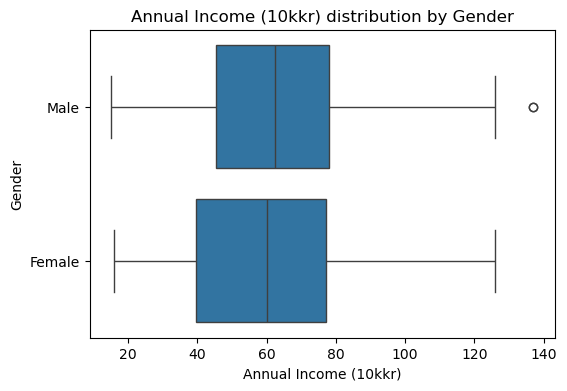

In [58]:
# Ritar boxplots för att se fördelningen i variablerna uppdelat på kön
# Boxplotsen hjälper mig att upptäcka skillnader mellan grupperna.
plt.figure(figsize=(6,4))
sns.boxplot(data=customer_data, x="Annual Income (10kkr)", y="Gender")
plt.title("Annual Income (10kkr) distribution by Gender")
plt.show()


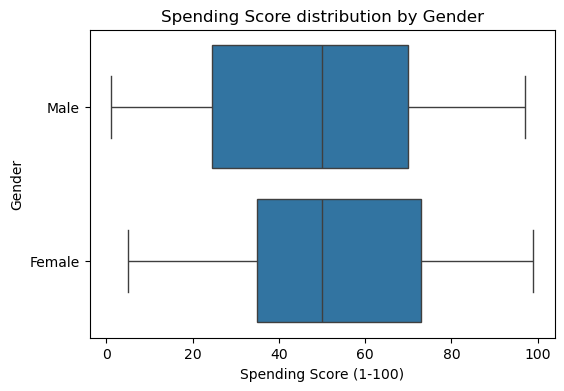

In [59]:
# Ritar boxplots för att se fördelningen i variablerna uppdelat på kön
# Boxplotsen hjälper mig att upptäcka outliers och skillnader mellan grupperna.
plt.figure(figsize=(6,4))
sns.boxplot(data=customer_data, x="Spending Score (1-100)", y="Gender")
plt.title("Spending Score distribution by Gender")
plt.show()


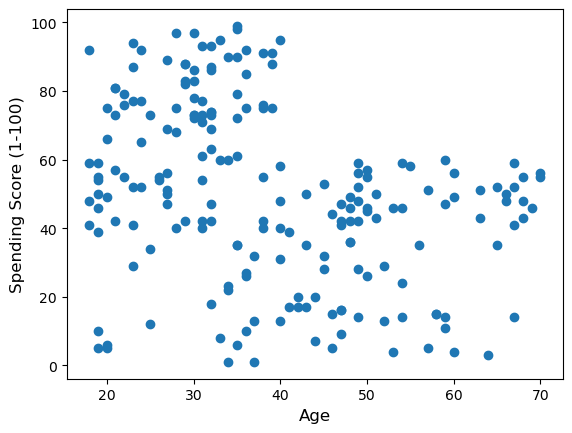

In [60]:
# Fokuserar på relationen mellan Age och Spending Score
# Detta hjälper oss att resonera kring olika kundsegment baserat på ålder och köpbeteende.
plt.scatter(customer_data.iloc[:,2].values, customer_data.iloc[:,4].values)
plt.xlabel("Age", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show()


In [61]:
# Detta fokuserar på relationen mellan Age och Spending Score
# Detta hjälper oss att resonera kring olika kundsegment baserat på ålder och köpbeteende.
X = customer_data[["Age", "Spending Score (1-100)"]].values


c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

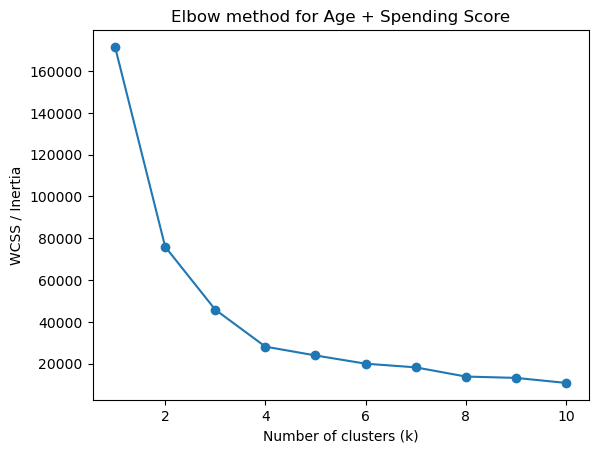

In [62]:
# Skapar en k-means-modell med valt antal kluster (k)
# Här testar vi hur datan grupperas när jag delar in kunderna i k olika kluster.
from sklearn.cluster import KMeans

wcss = []  
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)              
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow method for Age + Spending Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.show()


c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


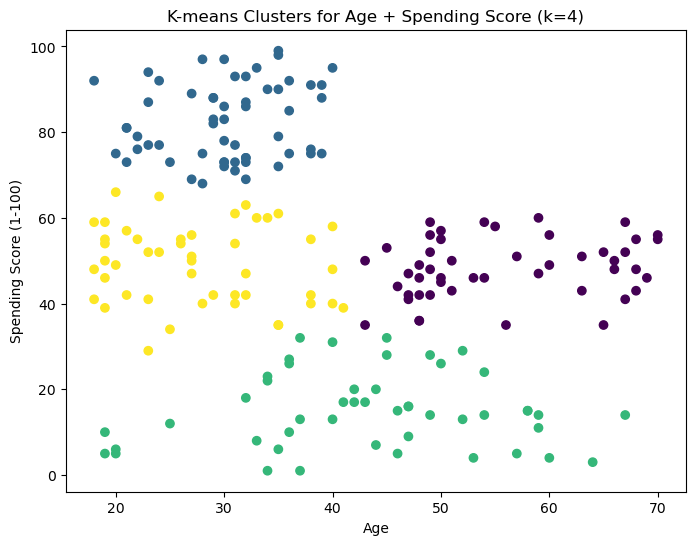

In [63]:
# Skapar en k-means-modell med valt antal kluster (k)
# Test för hur datan grupperas när vi delar in kunderna i k olika kluster.
k = 4  

kmeans_age = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters_age = kmeans_age.fit_predict(X)   


customer_data["Cluster_T13"] = clusters_age

plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=customer_data["Cluster_T13"], 
    cmap='viridis'
)

plt.title("K-means Clusters for Age + Spending Score (k=4)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [64]:
# Den här cellen är en del av arbetsflödet för T1
# Vi låter koden köra som den är men kommenterar kort vad som händer här.
kmeans_age.cluster_centers_


array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [65]:
# Denna fokuserar på relationen mellan Age och Spending Score. Detta hjälper mig att resonera kring olika kundsegment baserat på ålder och köpbeteende.
customer_data.groupby("Cluster_T13")[["Age", "Spending Score (1-100)"]].mean()


,Age,Spending Score (1-100)
Cluster_T13,,
0,55.708333,48.229167
1,30.175439,82.350877
2,43.291667,15.020833
3,27.617021,49.148936


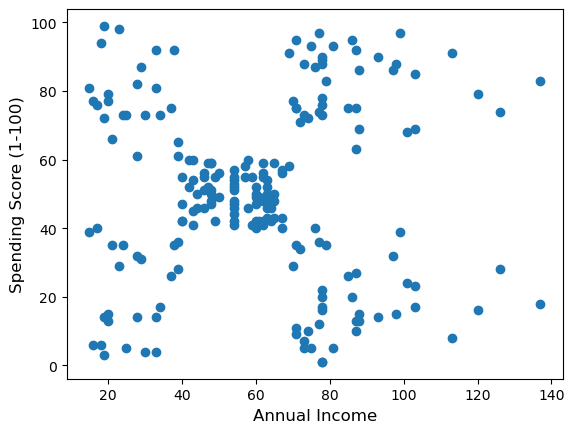

In [66]:
# Här analyserar vi sambandet mellan Annual Income och Spending Score
# Tanken är att hitta olika inkomst och spenderingsmönster bland kunder
plt.scatter(customer_data.iloc[:,3].values, customer_data.iloc[:,4].values)
plt.xlabel("Annual Income", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show()


In [67]:
# Här analyseras sambandet mellan Annual Income och Spending Score.
# Tanken är att hitta olika inkomst och spenderingsmönster bland kunderna
X2 = customer_data[["Annual Income (10kkr)", "Spending Score (1-100)"]].values


c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

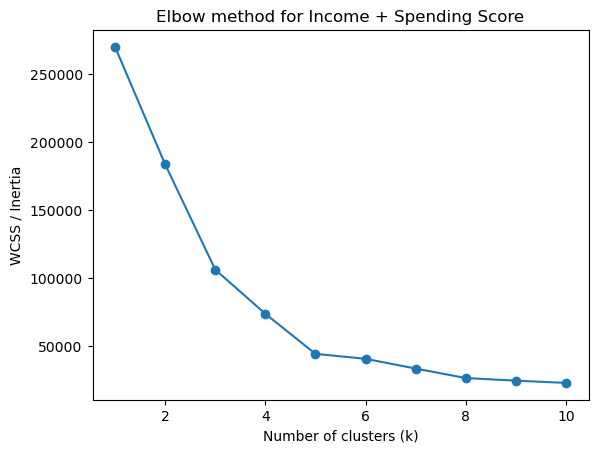

In [68]:
# Skapar en k-means-modell med valt antal kluster . Testas hur datan grupperas när vi delar in kunderna i k olika kluster.
from sklearn.cluster import KMeans

wcss = [] 
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X2)              
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow method for Income + Spending Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.show()


c:\Users\Raf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


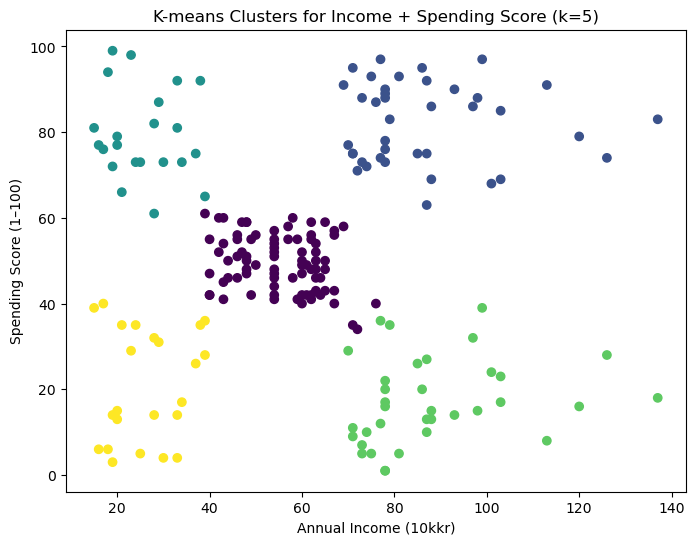

In [69]:
# Skapar en k-means-modell med valt antal kluster (k). Här testar vi hur datan grupperas när vi delar in kunderna i k olika kluster.
k = 5
kmeans_income = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_income = kmeans_income.fit_predict(X2) 

customer_data["Cluster_income"] = clusters_income

plt.figure(figsize=(8, 6))
plt.scatter(
    X2[:, 0],
    X2[:, 1],
    c=customer_data["Cluster_income"],
    cmap='viridis'
)
plt.title("K-means Clusters for Income + Spending Score (k=5)")
plt.xlabel("Annual Income (10kkr)")
plt.ylabel("Spending Score (1–100)")
plt.show()


In [70]:
# Den här cellen är en del av arbetsflödet för T1
kmeans_income.cluster_centers_


array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [71]:
# Här analyserar jag sambandet mellan Annual Income och Spending Score. Tanken är att hitta olika inkomst- och spenderingsmönster bland kunderna.
customer_data.groupby("Cluster_income")[["Annual Income (10kkr)", "Spending Score (1-100)"]].mean()


,Annual Income (10kkr),Spending Score (1-100)
Cluster_income,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
